# Behavioral data

## GABASnFR Gain adapation + SOVO

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from scipy.signal import medfilt
from scipy.stats import sem, ranksums
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set(font_scale=2, style='ticks')
t_pre = 10 # time window pre-swim
t_post = 35 # time window post-swim
t_sig = 30 # time used for significance test after swim
t_len = t_pre+t_post
t_flat = 15
t_valid = 21

In [2]:
vol_file = '../Analysis/depreciated/analysis_sections_GA_SOVO_SnFR.csv'
dat_xls_file = pd.read_csv(vol_file)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')

1.5945216049382716
08072019Fish1-1
7
58
85
13
30


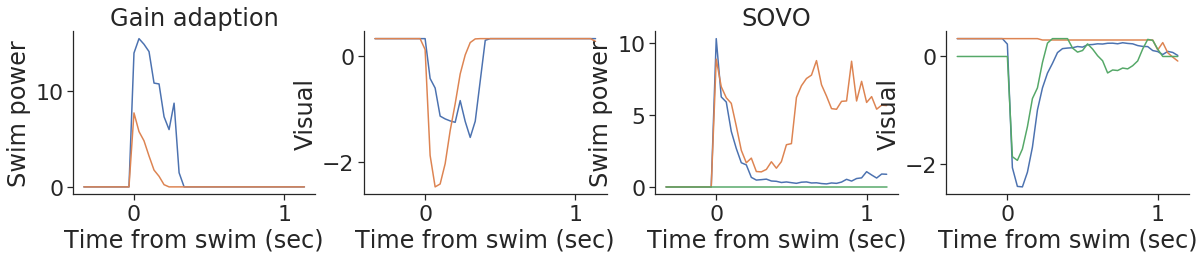

2.03869395711501
08072019Fish1-2
11
66
63
12
30


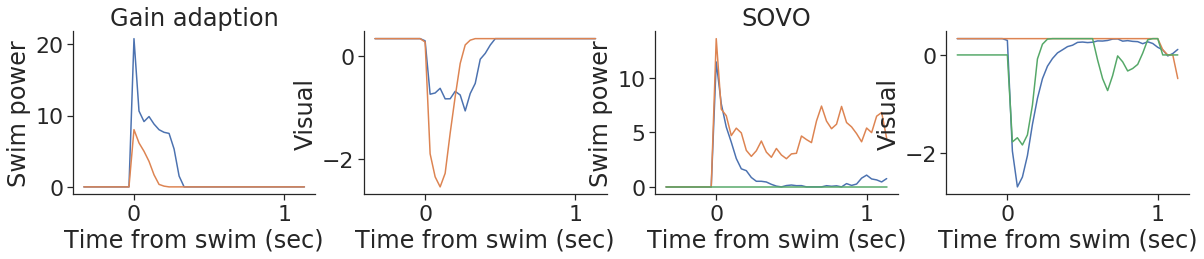

1.4549186128803961
08072019Fish2-1
17
72
116
22
24


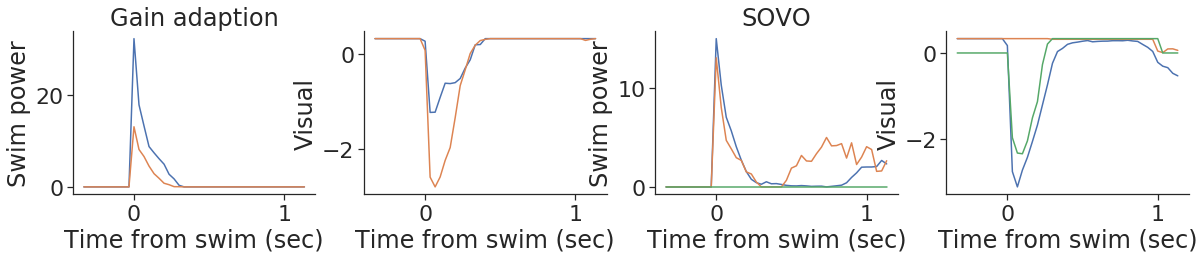

2.527228327228327
08072019Fish2-2
18
39
56
7
30


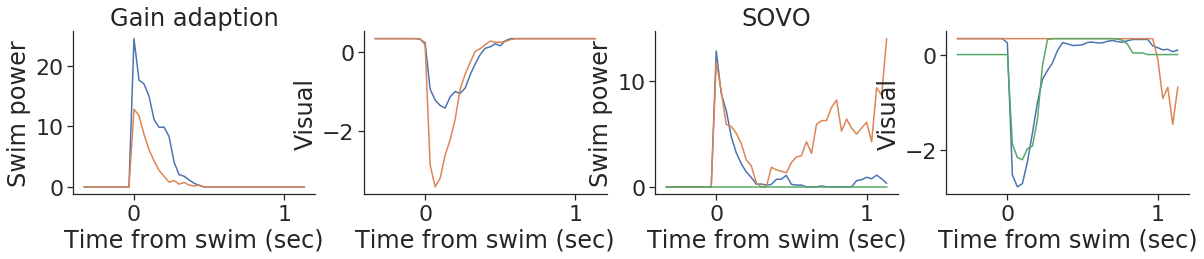

1.1507751937984496
08072019Fish3-1
15
62
111
26
10


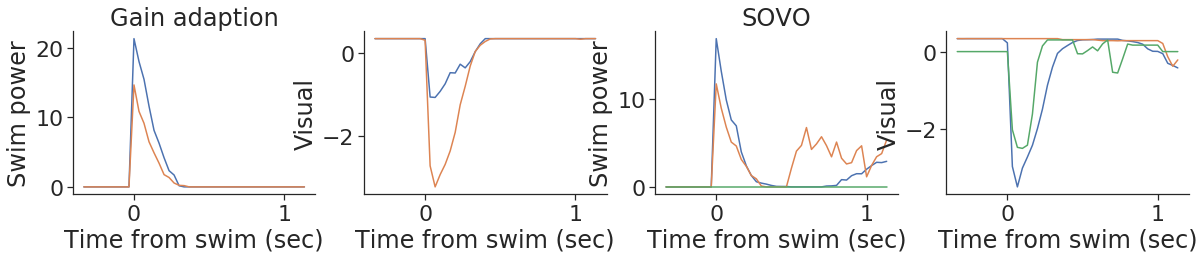

0.8419093851132686
08072019Fish3-2
0
22
113
53
3


/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice.
/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice.


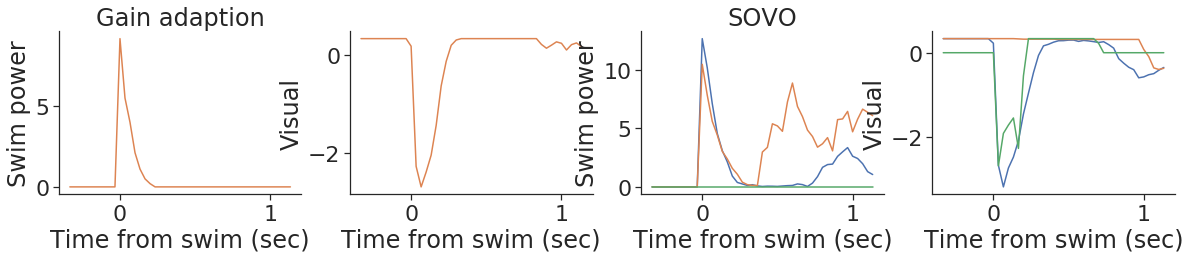

2.682948717948718
08082019Fish2-1
31
34
28
2
30


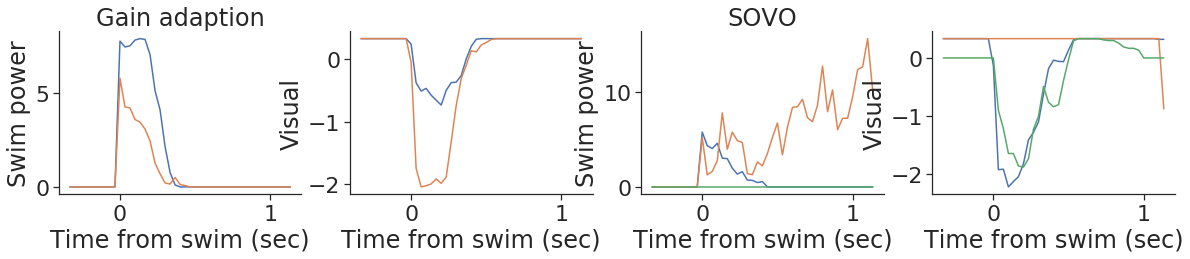

3.779166666666667
08082019Fish2-2
54
28
18
1
30


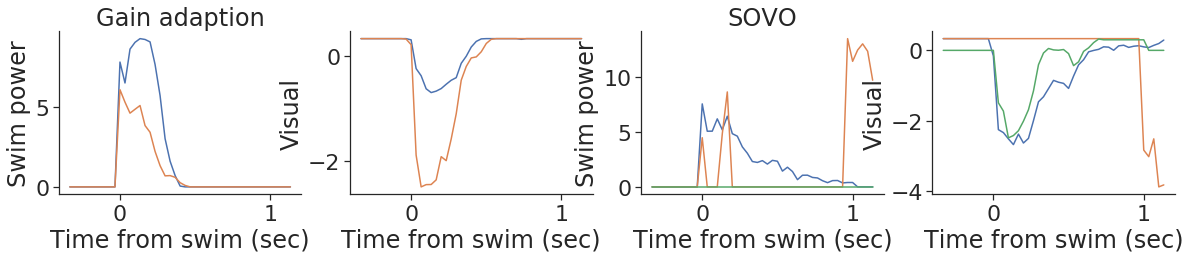

1.1832764505119455
08092019Fish1-1
27
29
116
25
6


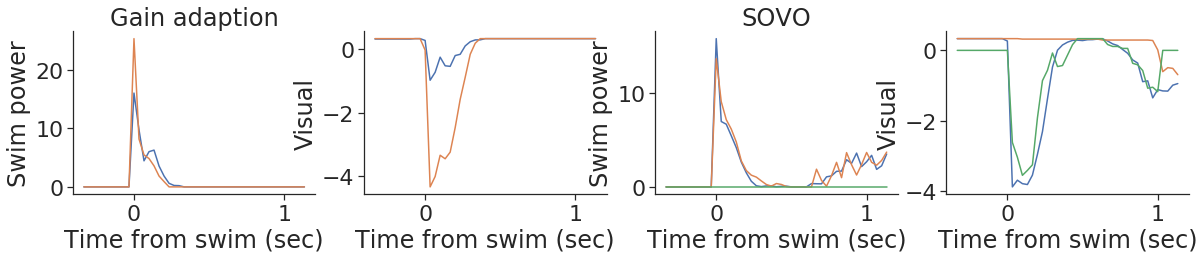

2.0216715257531583
08092019Fish1-2
42
42
63
19
16


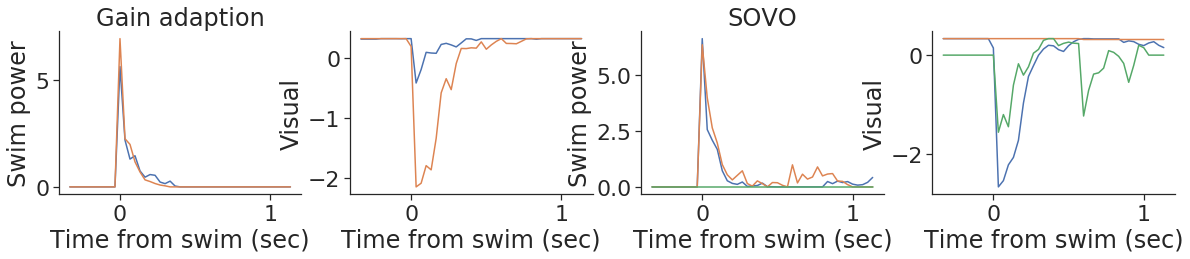

1.1695190156599553
08092019Fish2-1
6
39
123
35
27


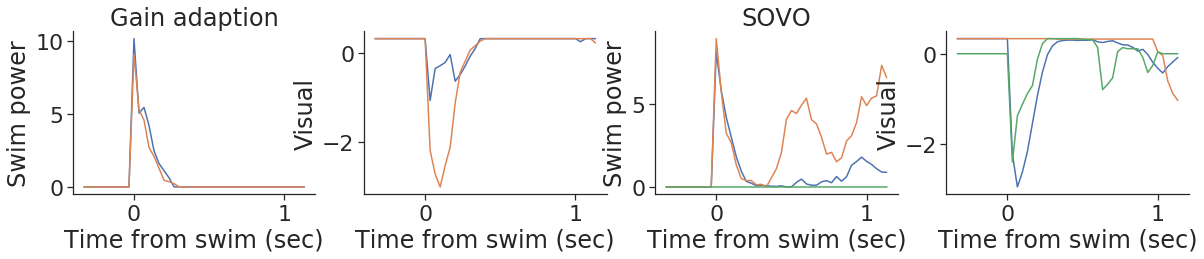

1.3948356807511737
08092019Fish2-2
0
63
58
29
25


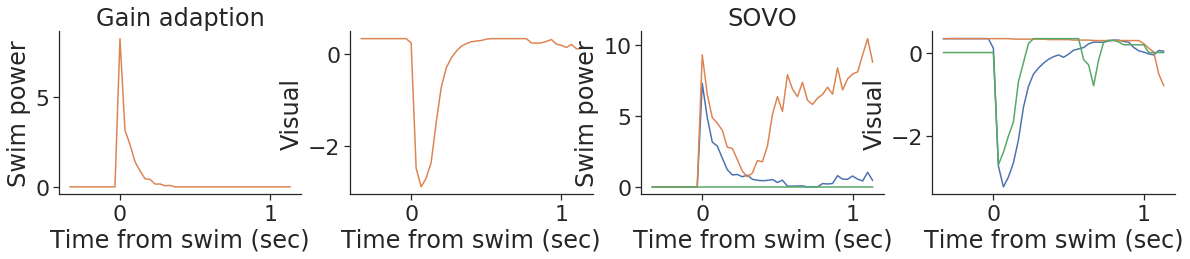

1.7675972927241963
08092019Fish3-1
27
58
96
19
28


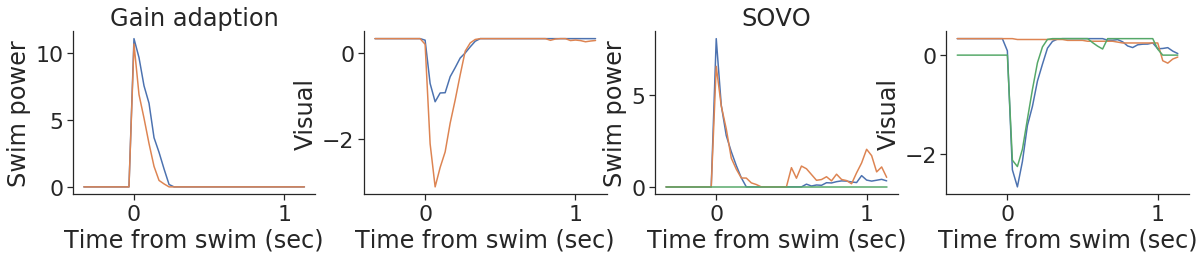

1.5618073316283037
08092019Fish3-2
10
51
83
20
25


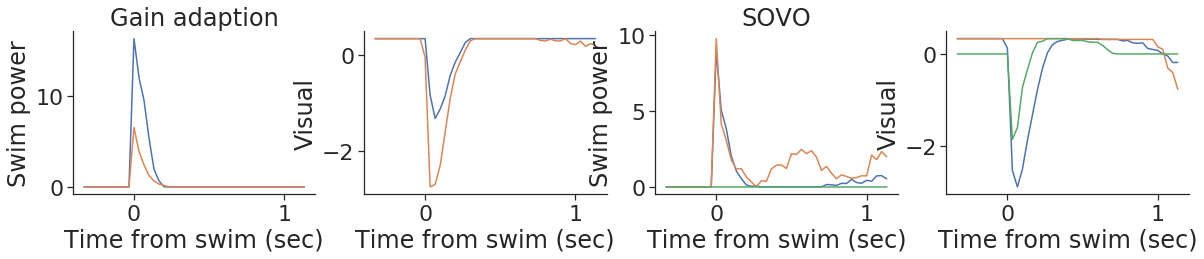

1.4777070063694269
08092019Fish4-1
10
74
97
14
23


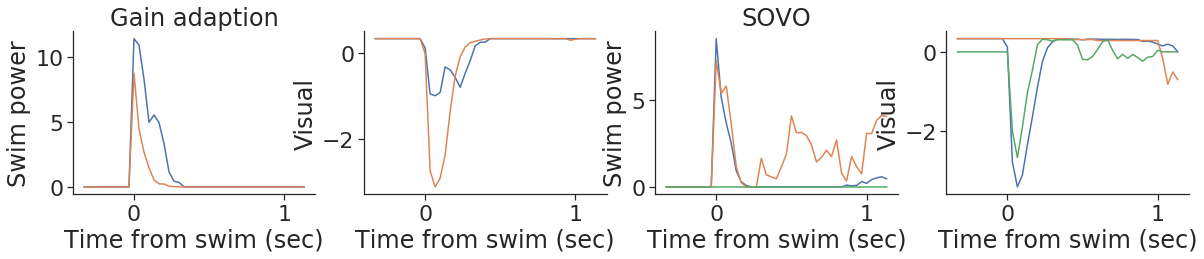

1.7450041981528128
08092019Fish4-2
5
64
90
8
30


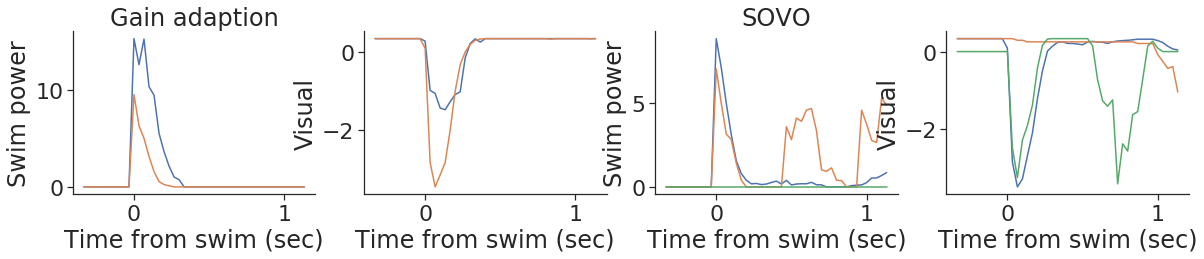

3.252582159624413
08102019Fish1-1
47
38
52
5
28


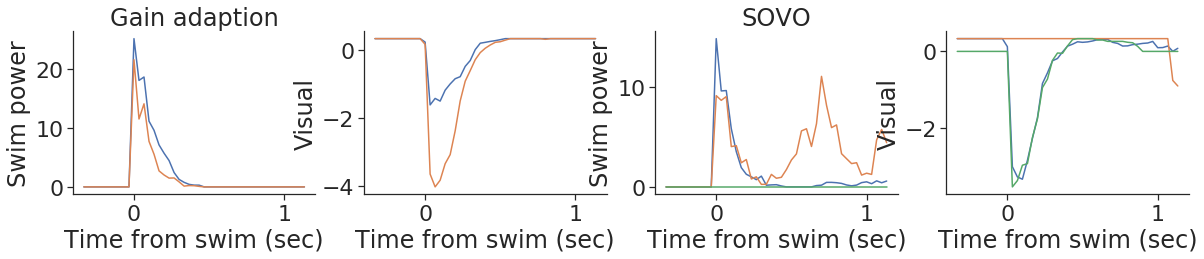

3.6656862745098038
08102019Fish1-2
38
27
21
2
30


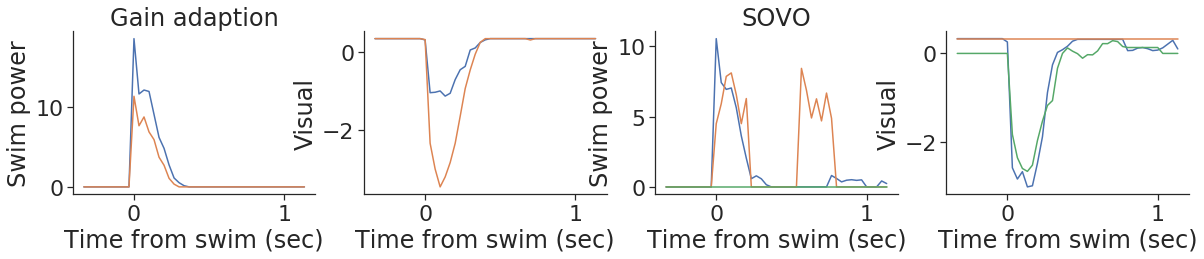

In [3]:
for _, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    task_type = row['task']
    if 'Delay' in task_type:
        continue
    _ = np.load(f'../Analysis/swim_power/{folder}_{fish}_swim_dat.npz')
    r_swim = _['r_swim']
    l_swim = _['l_swim']
    task_period = _['task_period'].astype('int')
    task_period_ = _['swim_task_index'].astype('int')
    visu = _['visu']
    p_swim = r_swim + l_swim
    swim_starts = _['swim_starts']
    swim_ends = _['swim_ends']
    swim_len = swim_ends - swim_starts
    valid_trial = (swim_len>=0)
    valid_trial = valid_trial & ~(((task_period==1) | (task_period==3)) & (p_swim[:, -t_valid:].sum(axis=-1)>0))
    valid_trial = valid_trial & (p_swim[:, :t_pre].sum(axis=-1)==0)
    valid_trial = valid_trial & ((visu[:, :t_pre]<0).mean(axis=-1)==0)
    valid_trial = valid_trial & ~((task_period_==2) & ((visu[:,t_pre:t_pre+30]<0).mean(axis=-1)>0)) # remove OL trial with visual
    valid_trial = valid_trial & ~((task_period_==4) & ((p_swim>0).mean(axis=-1)>0)) # remove VL trial with swim
    print(np.diff(swim_starts).mean()/30)
    print(folder + fish)
    fig, ax = plt.subplots(1, 4, figsize=(20, 3))
    ax[0].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period==1)].mean(axis=0))
    ax[0].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period==3)].mean(axis=0))
    sns.despine()
    ax[0].set_xlabel('Time from swim (sec)')
    ax[0].set_ylabel('Swim power')
    ax[0].set_title('Gain adaption')
    ind_ = [1, 2, 4]
    for n in range(3):
        ax[2].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period_==ind_[n])].mean(axis=0))
    sns.despine()
    ax[2].set_xlabel('Time from swim (sec)')
    ax[2].set_ylabel('Swim power')
    ax[2].set_title('SOVO')
    ax[1].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period==1)].mean(axis=0))
    ax[1].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period==3)].mean(axis=0))
    sns.despine()
    print((valid_trial & (task_period==1)).sum())
    print((valid_trial & (task_period==3)).sum())
    ax[1].set_xlabel('Time from swim (sec)')
    ax[1].set_ylabel('Visual')
    for n in range(3):
        ax[3].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period_==ind_[n])].mean(axis=0))
        print((valid_trial & (task_period_==ind_[n])).sum())
    sns.despine()
    ax[3].set_xlabel('Time from swim (sec)')
    ax[3].set_ylabel('Visual')
    plt.show()